In [1]:
import pandas as pd
import numpy as np
import datetime
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv(r"C:\Users\Rounak\Downloads\NYC Traffic Data.csv")
print("Initial Data Preview:")
print(df.head())

Initial Data Preview:
   RequestID       Boro    Yr   M   D  HH  MM  Vol  SegmentID  \
0       2439   Brooklyn  2009  12  12  16  15    0      19619   
1      17398  Manhattan  2014   6   9   8  45  142     152167   
2      16164      Bronx  2013  11  21   6  15   35     122838   
3      26015      Bronx  2017   6  16  13  45    6      86040   
4       2313   Brooklyn  2009  12   4   8  45   73     127441   

                                        WktGeom                street  \
0                     POINT (982509.4 163164.3)    N/B 15 AVE @ 80 ST   
1                       POINT (997424 225983.7)               PARK AV   
2                      POINT (1011633 248300.9)          VALENTINE AV   
3  POINT (1021090.0094792125 248997.7737956675)         CRUGER AVENUE   
4                     POINT (994379.9 167473.6)  N/B E 13 ST @  AVE I   

             fromSt              toSt Direction  
0             81 ST             80 ST        NB  
1           E 96 ST           E 97 ST        SB 

In [3]:
df = df.rename(columns={'Yr': 'year', 'M': 'month', 'D': 'day', 'HH': 'hour', 'MM': 'minute'})
df['Datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])
print("\nDatetime Conversion Preview:")
print(df[['year', 'month', 'day', 'hour', 'minute', 'Datetime']].head())
# Converting separate date & time columns into a single datetime column


Datetime Conversion Preview:
   year  month  day  hour  minute            Datetime
0  2009     12   12    16      15 2009-12-12 16:15:00
1  2014      6    9     8      45 2014-06-09 08:45:00
2  2013     11   21     6      15 2013-11-21 06:15:00
3  2017      6   16    13      45 2017-06-16 13:45:00
4  2009     12    4     8      45 2009-12-04 08:45:00


In [4]:
df['geometry'] = df['WktGeom'].apply(wkt.loads)
print("\nGeometry Conversion Preview:")
print(df[['WktGeom', 'geometry']].head())
# Converting WktGeom column (which stores location in text format) into geometry objects


Geometry Conversion Preview:
                                        WktGeom  \
0                     POINT (982509.4 163164.3)   
1                       POINT (997424 225983.7)   
2                      POINT (1011633 248300.9)   
3  POINT (1021090.0094792125 248997.7737956675)   
4                     POINT (994379.9 167473.6)   

                                       geometry  
0                     POINT (982509.4 163164.3)  
1                       POINT (997424 225983.7)  
2                      POINT (1011633 248300.9)  
3  POINT (1021090.0094792125 248997.7737956675)  
4                     POINT (994379.9 167473.6)  


In [5]:
df['X'] = df['geometry'].apply(lambda geom: geom.x)
df['Y'] = df['geometry'].apply(lambda geom: geom.y)
# Extracting latitude (Y) and longitude (X) from the geometry column

In [6]:
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['Month'] = df['Datetime'].dt.month

# Extracting additional temporal features from the datetime column

In [7]:
df = pd.get_dummies(df, columns=['Boro', 'Direction'])
# Converting categorical variables (boroughs and traffic directions) into numerical features

In [8]:
boro_cols = [col for col in df.columns if col.startswith('Boro_')]
direction_cols = [col for col in df.columns if col.startswith('Direction_')]
features = ['Hour', 'DayOfWeek', 'Month', 'X', 'Y'] + boro_cols + direction_cols
target = 'Vol'
# Separating features (X) and target variable (y)
X = df[features]
y = df[target]

print("\nFeatures Preview:")
print(X.head())
print("\nTarget Preview:")
print(y.head())


Features Preview:
   Hour  DayOfWeek  Month             X              Y  Boro_Bronx  \
0    16          5     12  9.825094e+05  163164.300000       False   
1     8          0      6  9.974240e+05  225983.700000       False   
2     6          3     11  1.011633e+06  248300.900000        True   
3    13          4      6  1.021090e+06  248997.773796        True   
4     8          4     12  9.943799e+05  167473.600000       False   

   Boro_Brooklyn  Boro_Manhattan  Boro_Queens  Boro_Staten Island  \
0           True           False        False               False   
1          False            True        False               False   
2          False           False        False               False   
3          False           False        False               False   
4           True           False        False               False   

   Direction_EB  Direction_EW  Direction_NB  Direction_NS  Direction_SB  \
0         False         False          True         False         Fals

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining and Testing split done.")


Training and Testing split done.


In [10]:
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)
# print("\nModel training complete.")

In [11]:
import joblib

In [12]:
# joblib.dump(model, "traffic_model.pkl")  # Save as a .pkl file
# print("\nModel saved as 'traffic_model.pkl'.")

In [13]:
loaded_model = joblib.load("traffic_model.pkl", mmap_mode="r")
print("\nLoaded model from 'traffic_model.pkl'.")


Loaded model from 'traffic_model.pkl'.


In [14]:
y_pred = loaded_model.predict(X_test)
# Predicts traffic volume on test data

In [15]:
# Evaluating model performance using different metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 24.322559166558182
Mean Squared Error (MSE): 3997.1245988728165
Root Mean Squared Error (RMSE): 63.222817074793625
R² Score: 0.8368322304870621


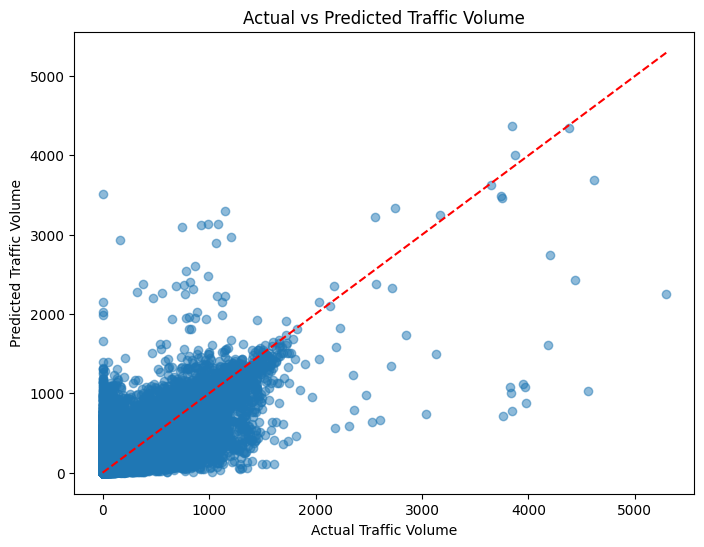

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted Traffic Volume")
plt.title("Actual vs Predicted Traffic Volume")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
# Visualizing actual vs predicted traffic volume

In [17]:
# Function to simulate real-time traffic data
def simulate_live_data():
    now = datetime.datetime.now() 
    x_min, x_max = df['X'].min(), df['X'].max()
    y_min, y_max = df['Y'].min(), df['Y'].max()

    simulated_data = pd.DataFrame({
         "Hour": [now.hour],
         "DayOfWeek": [now.weekday()],   
         "Month": [now.month],
         "X": [np.random.uniform(x_min, x_max)],
         "Y": [np.random.uniform(y_min, y_max)]
    })
    
    # Ensure the simulated data has the same features as the training data
    for col in boro_cols + direction_cols:
        simulated_data[col] = 0 
    
    # Set a specific borough and direction for testing
    if 'Boro_Manhattan' in simulated_data.columns:
        simulated_data['Boro_Manhattan'] = 1
    if 'Direction_NB' in simulated_data.columns:
        simulated_data['Direction_NB'] = 1

    return simulated_data

In [25]:
live_data = simulate_live_data()
predicted_volume = loaded_model.predict(live_data)[0]
print(f"\nPredicted Traffic Volume: {predicted_volume}")
def generate_recommendation(predicted_volume, threshold=150):
    return "High congestion detected: Activate emergency corridor." if predicted_volume > threshold else "Traffic normal."

recommendation = generate_recommendation(predicted_volume)
print("Recommendation for Traffic Authorities:", recommendation)


Predicted Traffic Volume: 541.4166666666666
Recommendation for Traffic Authorities: High congestion detected: Activate emergency corridor.
